In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [113]:
direct = r"C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset" 
# Directory of root folder of dataset (split into Train and Test Folders within that directory)

In [114]:
train_dataset_dir = "C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\train"
test_dataset_dir  = "C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\test"

In [115]:
# normalize the images as they are read in
# note: you can add other data augmentation functions to the ImageDataGenerator if you want
# Here is a page with what you can add to the ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [116]:
# create a stream of images, resized to 256x256, grouped into batches of size 8, and classified into 2 categories
train_dataset = train.flow_from_directory(train_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary')
test_dataset  = test.flow_from_directory(test_dataset_dir, target_size = (256,256), batch_size=8, class_mode='binary')

Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [117]:
model = Sequential() # create a new sequential model

In [118]:
# Add a 2D convolution layer with 16 features, a 3x3 filter size, relu activation, and padding
model.add(Conv2D(16, (3,3), activation='relu', padding = 'same', input_shape=(256,256,3)))
# Add a Max Pool layer with a 2x2 pooling window
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 32 features
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [119]:
# These are the same as above, except the convolution has 64 features
model.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

# These are the same as above, except the convolution has 128 features
model.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(2, 2))

In [120]:
# Flatten into a single vector
model.add(Flatten())

# Add a dense layer to 128 nodes (to extract relationships between features)
model.add(Dense(128))


In [121]:
# Final Dense layer with 1 node and "sigmoid" activation function to extract a binary prediction 
# (whether an image contains a tumor or not).
model.add(Dense(1, activation='sigmoid'))

In [122]:
# Compile the model using adam optimization, calculating loss using binary cross-entropy loss, and collect the metrics listed
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy', AUC(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])

In [123]:
# Print out a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)      

In [124]:
# Train the model on the training dataset over 10 epochs, using the test dataset to validate the results
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=5, validation_data=test_dataset)

Epoch 1/5
26/26 [==============================] - 6s 209ms/step - loss: 0.8032 - accuracy: 0.6584 - auc_5: 0.6426 - true_positives_5: 97.0000 - true_negatives_5: 36.0000 - false_positives_5: 42.0000 - false_negatives_5: 27.0000 - val_loss: 0.4077 - val_accuracy: 0.8627 - val_auc_5: 0.9153 - val_true_positives_5: 31.0000 - val_true_negatives_5: 13.0000 - val_false_positives_5: 7.0000 - val_false_negatives_5: 0.0000e+00
Epoch 2/5
26/26 [==============================] - 5s 187ms/step - loss: 0.5468 - accuracy: 0.7178 - auc_5: 0.7938 - true_positives_5: 98.0000 - true_negatives_5: 47.0000 - false_positives_5: 31.0000 - false_negatives_5: 26.0000 - val_loss: 0.4458 - val_accuracy: 0.8431 - val_auc_5: 0.8927 - val_true_positives_5: 31.0000 - val_true_negatives_5: 12.0000 - val_false_positives_5: 8.0000 - val_false_negatives_5: 0.0000e+00
Epoch 3/5
26/26 [==============================] - 5s 188ms/step - loss: 0.5109 - accuracy: 0.7822 - auc_5: 0.8069 - true_positives_5: 111.0000 - true_neg

In [125]:
import numpy as np
import cv2
from PIL import Image

In [126]:
new_image = cv2.imread('C:\\Users\\alan\\AI Project\\CSC547 Final Project\\brain_tumor_dataset\\unseen data with brain tumor.jpg')

In [127]:
new_image = cv2.resize(new_image, (256, 256))
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0

In [128]:
predictions = model.predict(new_image)
class_index = np.argmax(predictions)
class_label = classes[class_index]

1/1 [==============================] - 0s 69ms/step


In [129]:
print('Predicted class label:', class_label)

Predicted class label: Y1.jpg


In [130]:
import matplotlib.pyplot as plt

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

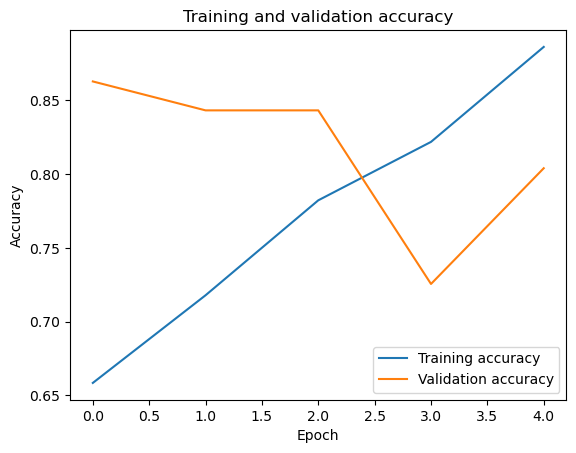

In [132]:
# plot the accuracy values
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

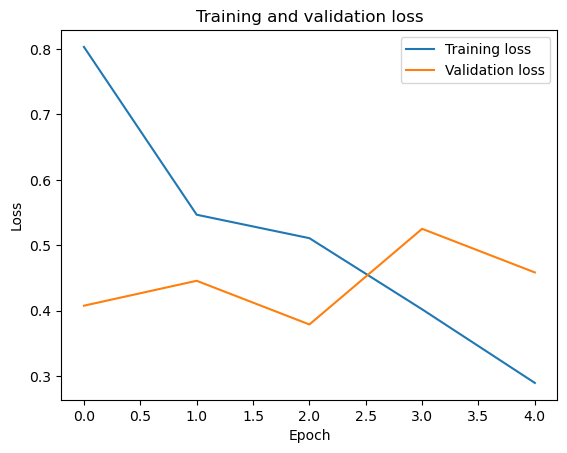

In [133]:
# plot the loss values
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()